In [1]:
import os
import math
from glob import glob

데이터 재정의할 이미지 path 설정

In [2]:
root_dir = "/media/mlfavorfit/sdb/detail_images/interpark"
target_dirs = [
    "뷰티/향수",
    "뷰티/클렌징",
    "뷰티/메이크업/아이메이크업",
    "뷰티/메이크업/베이스메이크업",
    "디지털/노트북데스크탑태블릿/태블릿액세서리",
    "식품/건강식품홍삼다이어트/다이어트식품",
]

In [3]:
image_paths = []

for target_dir in target_dirs:
    file_paths = glob(os.path.join(root_dir, target_dir, "imgs", "*"))
    image_paths.extend(zip(file_paths, [target_dir] * len(file_paths)))

In [4]:
import cv2

In [5]:
def visualize(img, screen_width=1920, screen_height=1080):

    cv2.namedWindow("temp", cv2.WINDOW_NORMAL)
    cv2.resizeWindow("temp", screen_width, screen_height)

    cv2.imshow("temp", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
def get_ratio(shape):
    height_and_width = shape[:2]
    return height_and_width[0] / height_and_width[1]

divide image

In [7]:
# default_ratio = 1100 / 860
default_ratio = 1.5

In [8]:
def divide_image(img):
    height, width, channel = img.shape
    image_ratio = get_ratio(img.shape)
    
    divided_image_cnt = image_ratio / default_ratio

    divided_image_height = int(height / divided_image_cnt)

    divided_image_list = []
    if divided_image_cnt < 2: # 이미지가 두개도 안 나올 때
        divided_image_list.append(img)
    else:    
        for idx in range(math.ceil(divided_image_cnt)):
            divided_image = img[idx*divided_image_height : (idx+1)*divided_image_height, :]
            divided_image_list.append(divided_image)

    return divided_image_list

In [9]:
def save_img(img, save_dir, file_name):
    save_path = os.path.join(save_dir, file_name)
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)

    cv2.imwrite(f'{save_path}.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 90])

main

In [10]:
detail_image_ratio_limit = 1.25
save_dir = "/media/mlfavorfit/sdb/divided_detail_images"

In [11]:
from tqdm import tqdm

In [12]:
for idx, (image_path, child_dir) in tqdm(enumerate(image_paths), total=len(image_paths)):
    img = cv2.imread(image_path)

    img_ratio = get_ratio(img.shape)    # 1>x => 가로가 더 긴 이미지 / 1<x => 세로가 더 긴 이미지
    
    if img_ratio < detail_image_ratio_limit:
        continue

    else:
        divided_image_list = divide_image(img)

        for div_idx, divided_image in enumerate(divided_image_list):
            save_img(divided_image, save_dir=os.path.join(save_dir, child_dir), file_name=f"{idx}_{div_idx}")
    

 48%|████▊     | 13926/29238 [04:46<04:32, 56.15it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 48%|████▊     | 13972/29238 [04:46<05:04, 50.13it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 48%|████▊     | 13980/29238 [04:47<04:42, 53.98it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 48%|████▊     | 14029/29238 [04:47<03:08, 80.59it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 48%|████▊     | 14060/29238 [04:47<02:15, 111.64it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 49%|████▊     | 14202/29238 [04:50<06:13, 40.26it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
 49%|████▉     | 1

Image ratio Histogram

In [10]:
from tqdm import tqdm

In [ ]:
img_ratio_list = []

for image_path in tqdm(image_paths, total=len(image_paths)):
    img = cv2.imread(image_path)

    try:
        img_ratio = get_ratio(img.shape)

        if img_ratio < 2 and img_ratio > 1.1:
            img_ratio_list.append(img_ratio)
    except:
        print("error")

len(img_ratio_list)

(array([461., 749., 572., 420., 766., 486., 407., 457., 372., 411.]),
 array([1.10092688, 1.19071791, 1.28050895, 1.37029998, 1.46009101,
        1.54988204, 1.63967308, 1.72946411, 1.81925514, 1.90904618,
        1.99883721]),
 <BarContainer object of 10 artists>)

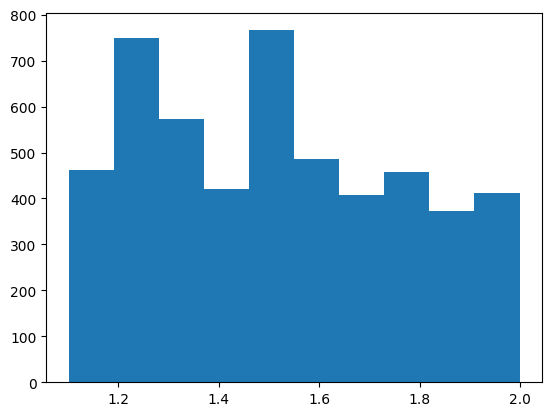

In [12]:
import matplotlib.pyplot as plt

plt.hist(img_ratio_list)